In [2]:
import pandas as pd


APT = pd.read_excel('/content/drive/MyDrive/IMbank_추천시스템/APT_매물.xlsx')


APT.head(10)


,아파트 이름,유형,가격,평수,층,방향,지역
0,대구범어아이파크 103동,월세,"5,000/150",109B/84m²,6/23층,남서향,대구광역시 수성구 범어동
1,대구범어아이파크 101동,전세,"7억 5,000",148/121m²,고/23층,남향,대구광역시 수성구 범어동
2,대구범어아이파크 101동,월세,3억/250,148/121m²,중/23층,남향,대구광역시 수성구 범어동
3,대구범어아이파크 103동,전세,"4억 5,000",109B/84m²,7/23층,남서향,대구광역시 수성구 범어동
4,대구범어아이파크 101동,전세,8억,148/121m²,16/23층,남향,대구광역시 수성구 범어동
5,대구범어아이파크 101동,전세,"4억 4,000",109B/84m²,3/23층,남서향,대구광역시 수성구 범어동
6,대구범어아이파크 104동,월세,"5,000/150",109B/84m²,3/25층,남서향,대구광역시 수성구 범어동
7,대구범어아이파크 101동,전세,8억,148/121m²,11/23층,남향,대구광역시 수성구 범어동
8,대구범어아이파크 101동,전세,5억,110A/84m²,4/23층,남향,대구광역시 수성구 범어동
9,대구범어아이파크 101동,전세,"4억 5,000",110C/84m²,8/23층,동향,대구광역시 수성구 범어동


In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 아파트 데이터 불러오기
APT = pd.read_excel('/content/drive/MyDrive/IMbank_추천시스템/APT_매물.xlsx')

# 아파트 이름 목록 출력
print(APT['아파트 이름'].unique())

# 아파트 선택 (예: 대구범어아이파크 101동)
selected_apartment = '대구범어아이파크 103동'

# 선택한 아파트가 데이터에 존재하는지 확인
if selected_apartment not in APT['아파트 이름'].values:
    print(f"{selected_apartment}는 데이터프레임에 존재하지 않습니다.")
else:
    # 아파트 데이터를 문자열로 결합하여 벡터화할 준비
    APT['특징'] = APT['아파트 이름'] + ' ' + APT['유형'] + ' ' + APT['가격'] + ' ' + APT['평수'] + ' ' + APT['층'] + ' ' + APT['방향'] + ' ' + APT['지역']

    # TF-IDF 벡터화
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(APT['특징'])

    # 선택한 아파트의 TF-IDF 벡터
    try:
        selected_index = APT[APT['아파트 이름'] == selected_apartment].index[0]
        selected_vector = tfidf_matrix[selected_index]

        # 코사인 유사도 계산
        cosine_similarities = cosine_similarity(selected_vector, tfidf_matrix).flatten()

        # 유사도 기준으로 아파트 추천
        APT['유사도'] = cosine_similarities
        recommended_apartments = APT.sort_values(by='유사도', ascending=False).head(10)  # 자기 자신을 포함하므로 6개로 선택

        # 추천 아파트 출력 (자기 자신 제외)
        recommended_apartments = recommended_apartments[recommended_apartments['아파트 이름'] != selected_apartment]

        # 추천 결과 출력
        print("추천 아파트:")
        print(recommended_apartments[['아파트 이름', '유형', '가격', '평수', '층', '방향', '지역', '유사도']])
    except IndexError:
        print("선택한 아파트가 데이터프레임에 존재하지 않습니다.")


['대구범어아이파크 103동' '대구범어아이파크 101동' '대구범어아이파크 104동' '대구범어아이파크 102동'
 '더센트럴화성파크드림(주상복합) 1동' '힐스테이트만촌역(주상복합) 104동' '힐스테이트만촌역(주상복합) 102동'
 '힐스테이트만촌역(주상복합) 106동' '힐스테이트만촌역(주상복합) 101동' '힐스테이트만촌역(주상복합) 105동'
 '힐스테이트만촌역(주상복합) 103동']
추천 아파트:
           아파트 이름  유형         가격         평수      층   방향             지역  \
12  대구범어아이파크 102동  월세  5,000/150  109B/84m²  3/22층  남서향  대구광역시 수성구 범어동   
6   대구범어아이파크 104동  월세  5,000/150  109B/84m²  3/25층  남서향  대구광역시 수성구 범어동   

         유사도  
12  0.748461  
6   0.732810  


In [20]:
!pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357270 sha256=6c3e9b476ae2154e1588a8fc8027e250b6e15e6da75be0644f16bcfc557cd3db
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [3]:
# # 가격 변환 함수
# def convert_price(price):
#     price = price.replace(' ', '')  # 공백 제거
#     # 월세와 전세 가격 구분
#     if '/' in price:
#         # 월세 형식 (예: 5,000/150)
#         monthly, _ = price.split('/')
#         monthly = monthly.replace(',', '').strip()

#         # 월세 가격이 억 단위로 표현된 경우를 처리
#         if '억' in monthly:
#             return float(monthly.replace('억', '').strip()) * 100000000  # 억 단위로 변환

#         return float(monthly)  # 월세 가격 반환
#     elif '억' in price:
#         return float(price.replace('억', '').replace(',', '').strip()) * 100000000  # 억 단위로 변환
#     elif '만' in price:
#         return float(price.replace('만', '').replace(',', '').strip()) * 10000  # 만 단위로 변환
#     else:
#         return float(price.replace(',', '').strip())  # 원 단위로 변환

# 평수 변환 함수
def convert_area(area):
    # m² 숫자 부분 가져오기
    square_meter = int(area.split('/')[1].replace('m²', '').strip())
    # 마지막 자리 숫자 제거 후 3을 곱하고 반올림
    area_calculated = round((square_meter // 10) * 3)  # // 연산으로 마지막 자리 숫자 제거
    return area_calculated

# 층 변환 함수
def convert_floor(floor):
    parts = floor.split('/')
    if parts[0] == '고':
        return int(parts[1][0])  # "고"의 경우 뒤 숫자 반환
    elif parts[0] == '저':
        return 1  # "저"는 항상 1로 설정
    elif parts[0] == '중':
        return int(int(parts[1][0]) / 2)  # "중"은 나누기 2
    else:
        return int(parts[0])  # 일반적인 숫자 반환

# 데이터프레임 변환
# APT['가격'] = APT['가격'].apply(convert_price)  # 가격 변환
APT['평수'] = APT['평수'].apply(convert_area)  # 평수 변환
APT['층'] = APT['층'].apply(convert_floor)  # 층 변환

# # 가격을 백만 단위로 변환하고 소수점 아래 0 제거
# APT['가격'] = (APT['가격'] / 1000000).round(0).astype(int)  # 백만 단위로 변환 후 정수형으로 변환

# # 컬럼 이름 변경
# APT.rename(columns={'가격': '가격(단위 : 100만)'}, inplace=True)

# 변환된 데이터프레임 출력
APT[['아파트 이름', '유형', '가격', '평수', '층', '방향', '지역']]


,아파트 이름,유형,가격,평수,층,방향,지역
0,대구범어아이파크 103동,월세,"5,000/150",24,6,남서향,대구광역시 수성구 범어동
1,대구범어아이파크 101동,전세,"7억 5,000",36,2,남향,대구광역시 수성구 범어동
2,대구범어아이파크 101동,월세,3억/250,36,1,남향,대구광역시 수성구 범어동
3,대구범어아이파크 103동,전세,"4억 5,000",24,7,남서향,대구광역시 수성구 범어동
4,대구범어아이파크 101동,전세,8억,36,16,남향,대구광역시 수성구 범어동
...,...,...,...,...,...,...,...
252,힐스테이트만촌역(주상복합) 104동,전세,5억,24,1,남동향,대구광역시 수성구 만천동
253,힐스테이트만촌역(주상복합) 105동,전세,5억,24,19,남동향,대구광역시 수성구 만천동
254,힐스테이트만촌역(주상복합) 102동,매매,"13억 5,007",39,1,남서향,대구광역시 수성구 만천동
255,힐스테이트만촌역(주상복합) 104동,매매,"9억 3,310",18,2,동향,대구광역시 수성구 만천동


In [19]:
APT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   아파트 이름  257 non-null    object 
 1   유형      257 non-null    object 
 2   가격      257 non-null    object 
 3   평수      257 non-null    int64  
 4   층       257 non-null    int64  
 5   방향      257 non-null    object 
 6   지역      257 non-null    object 
 7   특징      257 non-null    object 
 8   유사도     257 non-null    float64
dtypes: float64(1), int64(2), object(6)
memory usage: 18.2+ KB


#### 코사인 유사도 + SVD (행렬 인수 분해)

- 가격이 문자열로 되어있는데 숫자로 변환하고싶지만 시간이 촉박하여 변환하여 유사도를 출력하였으면 좋을듯하다.

- 모델 훈련 데이터 부족 -> 가상의 평점이 거의 동일 때문에 평점이 동일하게 나옴

In [13]:
import pandas as pd
import numpy as np  # numpy 추가
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# 아파트 이름 목록 출력
print(APT['아파트 이름'].unique())

# 아파트 선택
selected_apartment = input("추천 받을 아파트 이름을 입력하세요: ")

# 선택한 아파트가 데이터에 존재하는지 확인
if selected_apartment not in APT['아파트 이름'].values:
    print(f"{selected_apartment}는 데이터프레임에 존재하지 않습니다.")
else:
    # 아파트 데이터를 문자열로 결합하여 벡터화할 준비
    APT['특징'] = APT['아파트 이름'] + ' ' + APT['유형'] + ' ' + APT['가격'] + ' ' + APT['평수'].astype(str) + ' ' + APT['층'].astype(str) + ' ' + APT['방향'] + ' ' + APT['지역']

    # TF-IDF 벡터화
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(APT['특징'])

    # 선택한 아파트의 TF-IDF 벡터
    selected_index = APT[APT['아파트 이름'] == selected_apartment].index[0]
    selected_vector = tfidf_matrix[selected_index]

    # 코사인 유사도 계산
    cosine_similarities = cosine_similarity(selected_vector, tfidf_matrix).flatten()

    # 추천 아파트 선택
    APT['유사도'] = cosine_similarities
    recommended_apartments = APT.sort_values(by='유사도', ascending=False).head(10)

    # 랜덤한 평점 생성 (1부터 5까지)
    np.random.seed(42)  # 랜덤 시드 고정
    APT['가상의 평점'] = np.random.randint(1, 6, size=len(APT))

    # Surprise 라이브러리 사용하여 행렬 인수분해
    reader = Reader(rating_scale=(1, 5))  # 가상의 평점 범위
    data = Dataset.load_from_df(APT[['아파트 이름', '가상의 평점', '평수']], reader)  # '가상의 평점' 사용
    trainset, testset = train_test_split(data, test_size=0.2)

    model = SVD()
    model.fit(trainset)

    # 추천 아파트의 SVD 점수 계산
    svd_scores = []
    for apartment in recommended_apartments['아파트 이름']:
        svd_score = model.predict(selected_apartment, apartment).est  # 예측된 점수
        svd_scores.append(svd_score)

    recommended_apartments['SVD 점수'] = svd_scores

    # 추천 아파트 출력
    recommended_apartments = recommended_apartments[recommended_apartments['아파트 이름'] != selected_apartment]
    print("추천 아파트:")
    print(recommended_apartments[['아파트 이름', '유형', '가격', '평수', '층', '방향', '지역', '유사도', 'SVD 점수']])


['대구범어아이파크 103동' '대구범어아이파크 101동' '대구범어아이파크 104동' '대구범어아이파크 102동'
 '더센트럴화성파크드림(주상복합) 1동' '힐스테이트만촌역(주상복합) 104동' '힐스테이트만촌역(주상복합) 102동'
 '힐스테이트만촌역(주상복합) 106동' '힐스테이트만촌역(주상복합) 101동' '힐스테이트만촌역(주상복합) 105동'
 '힐스테이트만촌역(주상복합) 103동']
추천 받을 아파트 이름을 입력하세요: 대구범어아이파크 101동
추천 아파트:
           아파트 이름  유형        가격  평수  층  방향             지역       유사도  SVD 점수
73  대구범어아이파크 104동  전세  7억 5,000  36  1  남향  대구광역시 수성구 범어동  0.873658       5
85  대구범어아이파크 104동  전세  7억 8,000  36  1  남향  대구광역시 수성구 범어동  0.873658       5
46  대구범어아이파크 104동  전세        7억  36  4  남향  대구광역시 수성구 범어동  0.840907       5


In [24]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,644 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123620 files and dire

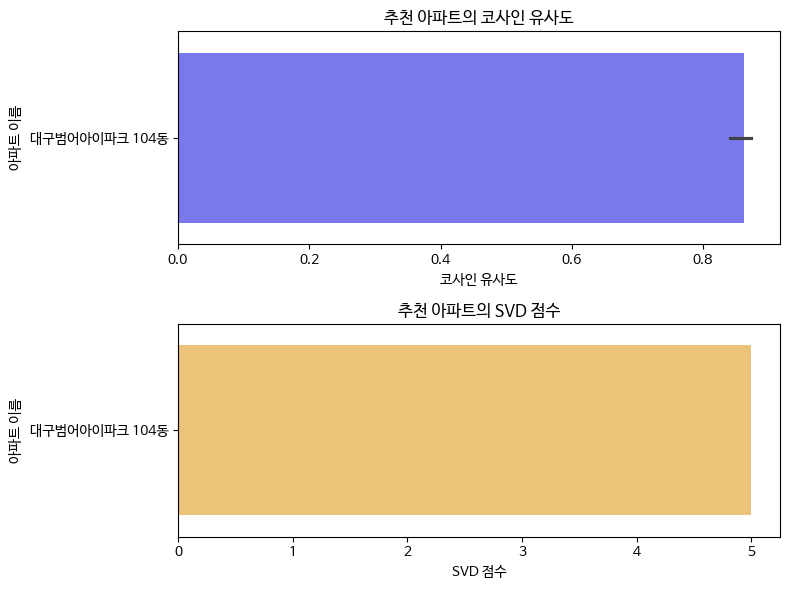

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# Figure와 서브플롯 생성
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

# 코사인 유사도 바플롯
sns.barplot(x='유사도', y='아파트 이름', data=recommended_apartments, color='blue', alpha=0.6, ax=axes[0])
axes[0].set_title('추천 아파트의 코사인 유사도')
axes[0].set_xlabel('코사인 유사도')
axes[0].set_ylabel('아파트 이름')

# SVD 점수 바플롯
sns.barplot(x='SVD 점수', y='아파트 이름', data=recommended_apartments, color='orange', alpha=0.6, ax=axes[1])
axes[1].set_title('추천 아파트의 SVD 점수')
axes[1].set_xlabel('SVD 점수')
axes[1].set_ylabel('아파트 이름')

# 그래프 간격 조정
plt.tight_layout()
plt.show()


#### 코사인 , 유클리드 혼합 - 유사도 너무 낮음

In [18]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

# 아파트 데이터 불러오기
APT = pd.read_excel('/content/drive/MyDrive/IMbank_추천시스템/APT_매물.xlsx')

# 아파트 이름 목록 출력
print(APT['아파트 이름'].unique())

while True:
    # 사용자로부터 아파트 이름 입력 받기
    selected_apartment = input("추천 받을 아파트 이름을 입력하세요: ")

    # 선택한 아파트가 데이터에 존재하는지 확인
    if selected_apartment not in APT['아파트 이름'].values:
        print(f"{selected_apartment}는 데이터프레임에 존재하지 않습니다. 다시 입력해주세요.")
    else:
        # 아파트 데이터를 문자열로 결합하여 벡터화할 준비
        APT['특징'] = APT['아파트 이름'] + ' ' + APT['유형'] + ' ' + APT['가격'] + ' ' + APT['평수'] + ' ' + APT['층'] + ' ' + APT['방향'] + ' ' + APT['지역']

        # TF-IDF 벡터화
        tfidf_vectorizer = TfidfVectorizer()
        tfidf_matrix = tfidf_vectorizer.fit_transform(APT['특징'])

        # 선택한 아파트의 TF-IDF 벡터
        selected_index = APT[APT['아파트 이름'] == selected_apartment].index[0]
        selected_vector = tfidf_matrix[selected_index]

        # 코사인 유사도 계산
        cosine_similarities = cosine_similarity(selected_vector, tfidf_matrix).flatten()

        # 유클리드 거리 계산
        euclidean_distances = pairwise_distances(tfidf_matrix, selected_vector, metric='euclidean').flatten()

                # 유사도와 거리 결합 (가중치 적용)
        alpha = 0.7  # 유사도 가중치
        beta = 0.3   # 거리 가중치
        combined_scores = (alpha * cosine_similarities) - (beta * euclidean_distances)


        # 추천 아파트 선택
        APT['점수'] = combined_scores
        recommended_apartments = APT.sort_values(by='점수', ascending=False).head(10)

        # 추천 아파트 출력 (자기 자신 제외)
        recommended_apartments = recommended_apartments[recommended_apartments['아파트 이름'] != selected_apartment]

        # 추천 결과 출력
        print("추천 아파트:")
        print(recommended_apartments[['아파트 이름', '유형', '가격', '평수', '층', '방향', '지역', '점수']])
        break  # 유효한 아파트가 입력되면 루프 종료


['대구범어아이파크 103동' '대구범어아이파크 101동' '대구범어아이파크 104동' '대구범어아이파크 102동'
 '더센트럴화성파크드림(주상복합) 1동' '힐스테이트만촌역(주상복합) 104동' '힐스테이트만촌역(주상복합) 102동'
 '힐스테이트만촌역(주상복합) 106동' '힐스테이트만촌역(주상복합) 101동' '힐스테이트만촌역(주상복합) 105동'
 '힐스테이트만촌역(주상복합) 103동']
추천 받을 아파트 이름을 입력하세요: 대구범어아이파크 101동
추천 아파트:
           아파트 이름  유형        가격         평수      층  방향             지역        점수
73  대구범어아이파크 104동  전세  7억 5,000  148/121m²  중/25층  남향  대구광역시 수성구 범어동  0.353322
85  대구범어아이파크 104동  전세  7억 8,000  148/121m²  저/25층  남향  대구광역시 수성구 범어동  0.353322
46  대구범어아이파크 104동  전세        7억  148/121m²  4/25층  남향  대구광역시 수성구 범어동  0.324133
